<a href="https://colab.research.google.com/github/Nhutsang/Finalproject/blob/main/fashion3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [21]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential


from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import os
import cv2
import numpy as np

data_folder = '/content/drive/MyDrive/data/datatrain/'
categories = ['Trouser', 'Sandal', 'Glasses', 'Watch', 'Sneaker']

X = []
y = []

# Đọc và chuyển đổi ảnh thành ma trận numpy
for category in categories:
    category_dir = os.path.join(data_folder, category)
    for image_file in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (50, 50))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X.append(image)
        y.append(categories.index(category))

# Chuyển đổi danh sách thành mảng numpy
X = np.array(X)
y = np.array(y)

# In thông tin của X_train và y_train
print('Kích thước X_train:', X.shape)
print('kich thuoc y:', y.shape)


Kích thước X_train: (750, 50, 50, 3)
kich thuoc y: (750,)


In [24]:
#X_train, X_val , y_train , y_val = train_test_split(X, y , test_size = 0.1)
#X_test, y_test = train_test_split(X,y , test_size = 0.1)

X_train_val, X_test , y_train_val , y_test = train_test_split(X, y , test_size = 0.1)
X_train , X_val , y_train , y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2)

In [25]:
print('Kích thước X_train:', X_train.shape)
print('kich thuoc y_train:', y_train.shape)

print('Kích thước X_test:', X_test.shape)
print('kich thuoc y_test:', y_test.shape)

Kích thước X_train: (540, 50, 50, 3)
kich thuoc y_train: (540,)
Kích thước X_test: (75, 50, 50, 3)
kich thuoc y_test: (75,)


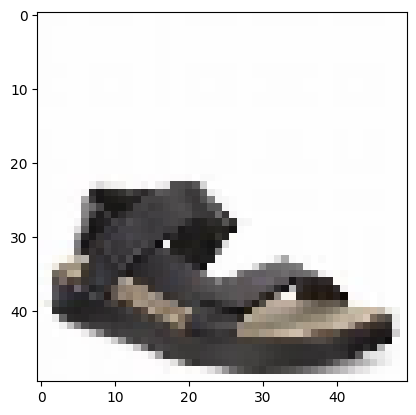

In [26]:
plt.imshow(X_train[0])

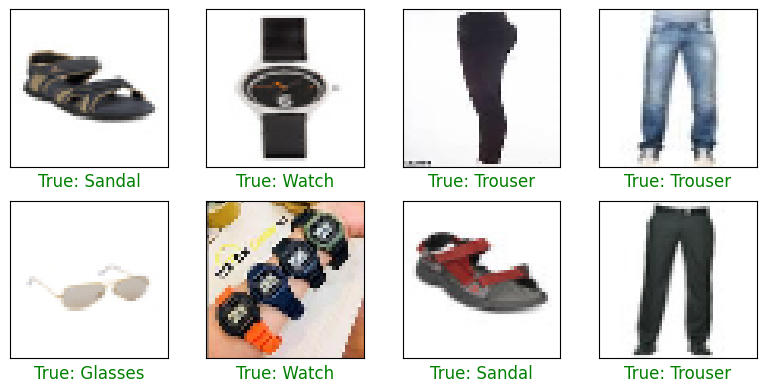

In [27]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None :
  nrows, ncols = 2 ,4 
  fig, axes = plt.subplots(nrows, ncols , figsize = (8,4))
  len_x = x_data.shape[0]
  for idx  in range(nrows*ncols):
    ax = axes[idx // ncols , idx % ncols]
    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap = 'gray')
    ax.set(xticks = [], yticks = [])

    true_label_str = f"True: {categories[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str, color = 'green', fontsize = 12 )

  plt.tight_layout()
  plt.show()
plot_data(X_train , y_train)

In [28]:
X_train = X_train.astype(np.float32) / 255


In [29]:
y_train = np.reshape(y_train, (-1, 1))
y_train = to_categorical(y_train)

y_test= to_categorical(y_test)
y_train[0]

array([0., 1., 0., 0., 0.], dtype=float32)

In [30]:
classnum = len(categories)
y_train_label = keras.utils.to_categorical(y_train, classnum)

#print('Kích thước classum:', classum)

In [31]:
input_shape= (50,50,3)

In [32]:
#model = keras.models.Sequential([
#    layers.Flatten(input_shape = input_shape),
#    layers.Dense(512, activation = 'relu'),
#    layers.Dense(256, activation = 'relu'),
 #   layers.Dense(classnum, activation = 'softmax')
#])

#model.summary( )

In [33]:
from keras.models import Sequential
model = Sequential()

model.add(Conv2D(64, kernel_size =(3,3), activation = 'relu', input_shape=(50,50,3), padding = 'same' ))
model.add(MaxPooling2D(pool_size = (2,2), strides =2 ))
model.add(Conv2D(32, kernel_size= (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size= (2,2), strides = 2))
model.add(Flatten())
model.add(Dense(5,activation = 'softmax'))

In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [35]:
# Biên dịch 
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size) 
#history=model.fit(training_set,epochs=100,batch_size=32)

model.fit(X_train, y_train,epochs= 5,validation_split= 0.2)



Epoch 1/5
14/14 [==============================] - 16s 92ms/step - loss: 1.5108 - accuracy: 0.3819 - val_loss: 1.3242 - val_accuracy: 0.4630
Epoch 2/5
14/14 [==============================] - 0s 14ms/step - loss: 1.0487 - accuracy: 0.6157 - val_loss: 0.8942 - val_accuracy: 0.7130
Epoch 3/5
14/14 [==============================] - 0s 20ms/step - loss: 0.6670 - accuracy: 0.7269 - val_loss: 0.7297 - val_accuracy: 0.7407
Epoch 4/5
14/14 [==============================] - 0s 12ms/step - loss: 0.5086 - accuracy: 0.8102 - val_loss: 0.6176 - val_accuracy: 0.7778
Epoch 5/5
14/14 [==============================] - 0s 17ms/step - loss: 0.3910 - accuracy: 0.8727 - val_loss: 0.5164 - val_accuracy: 0.8333


In [63]:
model.save('/content/drive/MyDrive/data/a1')

In [64]:
model1= load_model('/content/drive/MyDrive/data/a1')

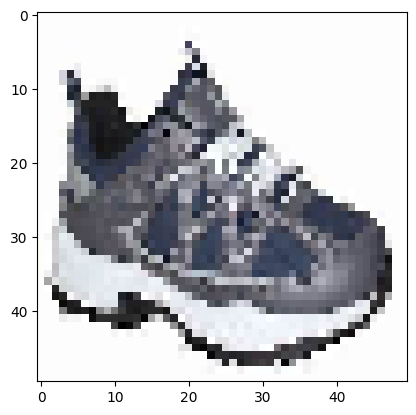

In [65]:
img = load_img('/content/drive/MyDrive/data/test/1.jpg', target_size=(50,50))
plt.imshow(img)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Final Project/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

In [58]:
yhat =model.predict(X_test[0:1])
yhat


1/1 [==============================] - 0s 19ms/step


array([[1.5407943e-05, 0.0000000e+00, 9.9998462e-01, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [59]:
y_label = np.argmax(yhat, axis = 1)
y_label

array([2])

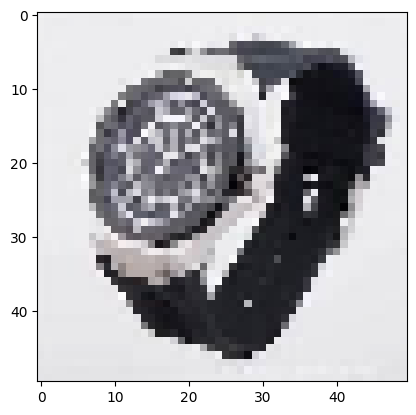

In [60]:
plt.imshow(X_test[2])

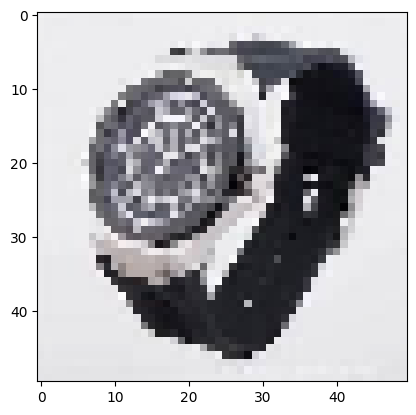

In [62]:
plt.imshow(X_test[2])
plt.show()